In [35]:
#import library
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout,Flatten,Input,Conv2D,BatchNormalization,GlobalAvgPool2D,MaxPooling2D

In [36]:
#load_data

fm=keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,test_labels) = fm.load_data()

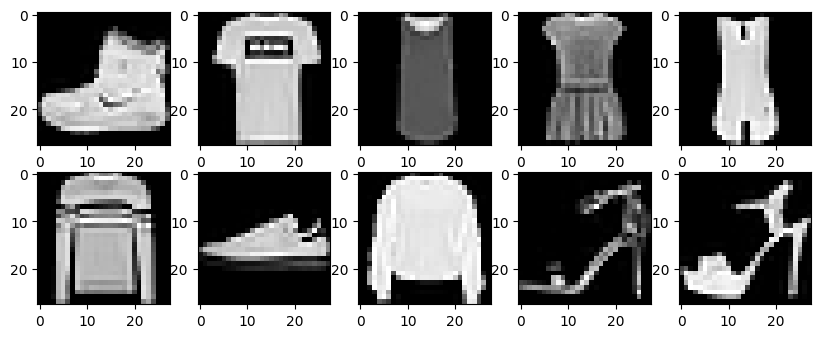

In [37]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
plt.show()

In [38]:
#normalize
x_train = train_images.reshape((60000,28,28,1)).astype('float32') / 255.0
x_test = test_images.reshape((10000,28,28,1)).astype('float32') / 255.0

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [39]:
model=Sequential([
    #Input(shape=(28,28)),

    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    #layers.Flatten(),
    GlobalAvgPool2D(),

    Dropout(0.5),

    Dense(64, activation='relu'),
    Dropout(0.5),

    Dense(10,activation='softmax')])

In [40]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [41]:
model.fit(x_train, train_labels,epochs=30,batch_size=64,validation_split=0.1)

Epoch 1/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4194 - loss: 1.5222 - val_accuracy: 0.7488 - val_loss: 0.6459
Epoch 2/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6998 - loss: 0.7932 - val_accuracy: 0.7888 - val_loss: 0.5542
Epoch 3/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7417 - loss: 0.6862 - val_accuracy: 0.8122 - val_loss: 0.5034
Epoch 4/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7675 - loss: 0.6211 - val_accuracy: 0.8285 - val_loss: 0.4568
Epoch 5/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7862 - loss: 0.5842 - val_accuracy: 0.8387 - val_loss: 0.4289
Epoch 6/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8007 - loss: 0.5532 - val_accuracy: 0.8502 - val_loss: 0.3955
Epoch 7/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8149 - loss: 0.5165 - val_accuracy: 0.8543 - val_loss: 0.3785
Epoch 8/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8222 - loss: 0.5014 - val_accuracy: 0

In [42]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 209,408 (818.00 KB)

 Trainable params: 69,802 (272.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 139,606 (545.34 KB)

In [43]:
print(model.evaluate(x_test,test_labels,verbose=2))

313/313 - 1s - 4ms/step - accuracy: 0.9009 - loss: 0.2794
[0.27939820289611816, 0.9009000062942505]


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Confusion matrix, without normalization
[[475   9  35  68 151   3 190   1  42  26]
 [  1 943   4  32  10   1   4   0   1   4]
 [ 28  49 256  11 519   1  88   4  34  10]
 [ 23  15   5 547 134   4  46   0  20 206]
 [  2   1   2   7 946   2  22   0   9   9]
 [ 10   0   0   0   3 828   2  28  81  48]
 [ 75   9  25  27 531   4 280   0  32  17]
 [ 12   0   0   0   0  79   1 558 154 196]
 [  8   1   9   2  62  83  15   0 727  93]
 [  0   1   0   0   0   8   0   4   1 986]]


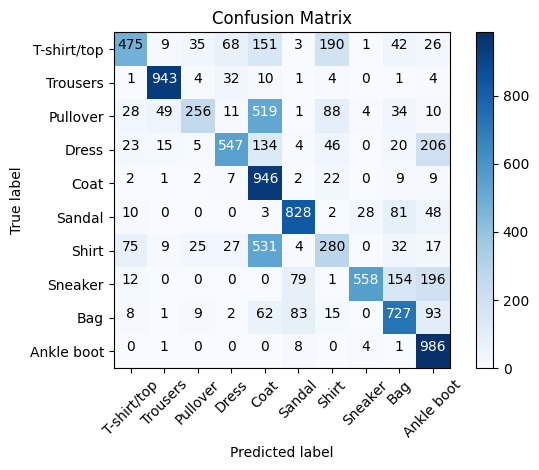

In [44]:
from sklearn.metrics import confusion_matrix
import itertools

predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# رسم ماتریس سردرگمی
conf_mtx = confusion_matrix(test_labels, predicted_classes)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()

# تعریف کلاس‌ها
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure()
plot_confusion_matrix(conf_mtx, classes=class_names, title='Confusion Matrix')

plt.show()